[View in Colaboratory](https://colab.research.google.com/github/neoaksa/Pandas-Matplotlib/blob/master/Matplotlib.ipynb)

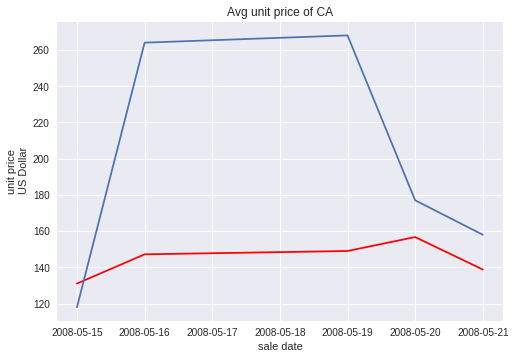

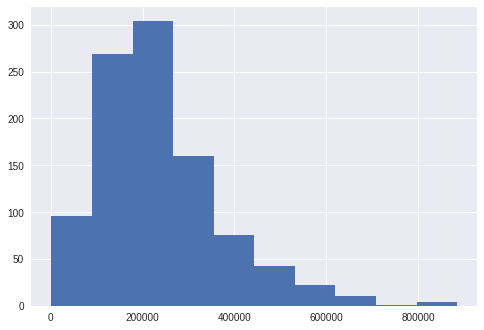

In [22]:
# import pyplot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd

df1 = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv',
                 index_col=['latitude','longitude'])
df1['unit_price'] = np.where(df1['sq__ft']==0,np.NaN,df1['price']/df1['sq__ft'])
df1['sale_date'] = pd.to_datetime(df1['sale_date']) 
df1 = df1.sort_values(['sale_date','unit_price'])
df2 = df1.groupby('sale_date').agg({'unit_price':np.mean,'sale_date':np.size})
df2 = df2.rename(columns={'sale_date':'count'})
df2.head(5)
# x, y axis
plt.plot(df2.index,df2['unit_price'],color='r')
plt.plot(df2.index,df2['count'])

# set the labels for x, y axis
plt.xlabel('sale date')
plt.ylabel('unit price\n US Dollar')
plt.title('Avg unit price of CA')
# bring it front
plt.show()

# histogram 
plt.hist(df1['price'])
plt.show()

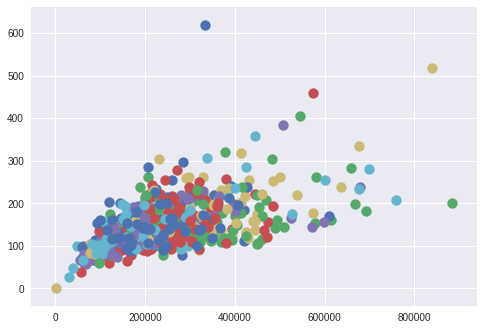

In [41]:
# scatter plot
groups = df1.groupby('zip')
fig,ax = plt.subplots()
for name, group in groups:
    # s = size, marker = sharp 
    plt.scatter(group['price'],group['unit_price'],s=100)
plt.show()